In [29]:
#%%
import networkx as nx
import igraph as ig
import pandas as pd
import seaborn as sns


# get users with most mentions


In [57]:

full_network_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_retweets.gml'
topics_file = '/Volumes/boot420/Users/data/climate_network/cop22/cache/topics_cop22.csv'
projected_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_reply_projected.gml'

test_network = '/Users/alessiogandelli/dev/internship/tweets-to-topic-network/data/networks/toy_test.gml'

# load network
g = ig.read(full_network_path, format='gml')

topic_name = pd.read_csv(topics_file)

/Users/alessiogandelli/dev/internship/tweets-to-topic-network/venv/lib/python3.9/site-packages/igraph/io/files.py:295: RuntimeWarning: One or more unknown entities will be returned verbatim (&#8217;). at src/io/gml.c:149
  return reader(f, *args, **kwds)


# Full network 

In [31]:
# %%
# some statistics about the network
#number of nodes bipartite = 1 (user)

# %%
tweets = g.vs.select(bipartite=1)
user = g.vs.select(bipartite=0)

print('Number of tweets: ', len(tweets))
print('Number of users: ', len(user))


# %%
# outdegree for users 
user_outdegree = g.degree(user, mode='out')
# histogram
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,10]
xticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

Number of tweets:  111273
Number of users:  42847


## Users 

In [33]:
user_outdegree = g.degree(user, mode='out')
user_indegree = g.degree(user, mode='in')
df_user_degree = pd.DataFrame({'user': user['label'], 'mentions': user_indegree, 'tweets': user_outdegree})
df_user_degree.sort_values(by='mentions', ascending=False).head(20)



,user,mentions,tweets
38,COP22,2391,712
123,UNFCCC,2216,498
30921,PUANConference,1804,0
11970,PakUSAlumni,1480,140
8592,JohnKerry,822,1
1870,UN,816,55
19782,c0nvey,787,0
950,UNDP,776,216
2291,UNEP,607,98
171,GlobalLF,505,144


(0.0, 0.5055388686261889)

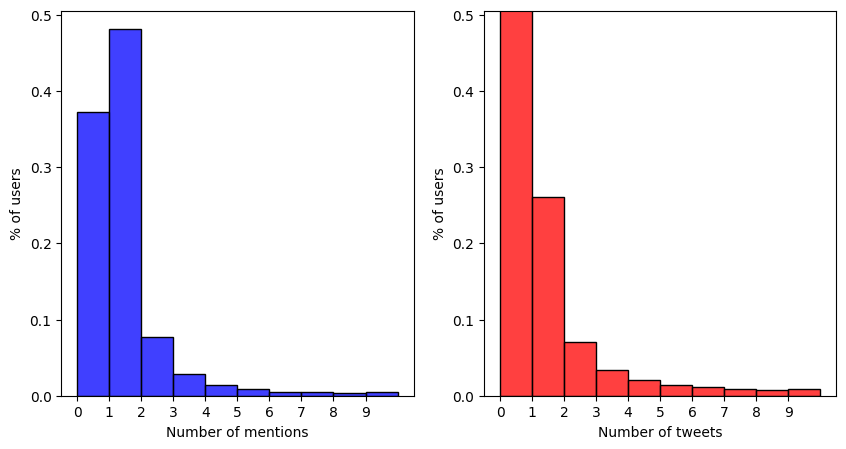

In [34]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df_user_degree['mentions'], ax=ax[0], bins=bins, kde=False, color='blue', stat='probability')
sns.histplot(df_user_degree['tweets'], ax=ax[1], bins=bins, kde=False, color='red', stat='probability')
ax[0].set_xticks(xticks)
ax[1].set_xticks(xticks)
ax[0].set_xlabel('Number of mentions')
ax[1].set_xlabel('Number of tweets')
ax[0].set_ylabel('% of users')
ax[1].set_ylabel('% of users')
# same y axis
ax[1].set_ylim(ax[0].get_ylim())


## Tweets

most retweeted tweets 

In [36]:
tweets_outdegree = g.degree(tweets, mode='out')
tweets_indegree = g.degree(tweets, mode='in')
df_tweets_degree = pd.DataFrame({'tweet': tweets['label'], 'retweets': tweets_indegree })
# remove one because it is the edge from the user 
df_tweets_degree['retweets'] = df_tweets_degree['retweets'] - 1 

df_tweets_degree.sort_values('retweets', ascending=False).head(20)





,tweet,retweets
64472,796729267589619713,29
61468,797002060067643392,8
60665,797034148875616257,7
36961,798521019413696512,6
34065,798606722474479616,6
61441,797003310775631872,6
110697,797028126295465984,4
83765,795329013623484416,3
110270,798973185639055360,3
12647,800010279136305152,3


https://twitter.com/LeoDiCaprio/status/800010279136305152
https://twitter.com/WWF/status/797251350996385792
https://twitter.com/Maersk/status/798922305241903104
https://twitter.com/UNICEF/status/796750685068881920

<Axes: xlabel='retweets', ylabel='Probability'>

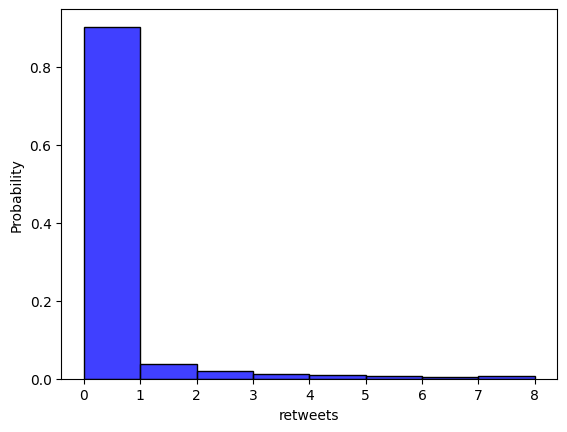

In [8]:
# histoplot 
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8]
sns.histplot(df_tweets_degree['retweets'], bins=bins, kde=False, color='blue', stat='probability')

In [9]:
# how many 0 retweets 
print('tweets with 0 retweets: ',len(df_tweets_degree[df_tweets_degree['retweets'] == 0]))

tweets with 0 retweets:  404026


In [20]:
# number of tweets that are not retweeting 

g.summary()


'IGRAPH D-W- 17 19 -- \n+ attr: author (v), bipartite (v), id (v), is_retweet (v), label (v), text (v), topics (v), date (e), weight (e)'

In [26]:
original_tweets = g.vs.select(is_retweet='original')
print('there are ', len(original_tweets), 'original tweets(not retweeted)')

In [27]:
len(original_tweets)

6

## topics 

In [49]:
topics = g.vs['topics']
label = g.vs['label']
df_topics = pd.DataFrame({'label': label, 'topics': topics})

In [53]:
# drop rows with nan
df_topics = df_topics.dropna()
df_topics['topics'].value_counts()

topics
-1.0     44578
 0.0     18335
 1.0      3412
 2.0      3253
 3.0      2858
         ...  
 93.0      114
 94.0      112
 95.0      112
 96.0      109
 97.0      105
Name: count, Length: 99, dtype: int64

In [55]:
topics_file = '/Volumes/boot420/Users/data/climate_network/cop22/cache/topics_cop22.csv'
topic_name = pd.read_csv(topics_file)

In [56]:
topic_name

,Unnamed: 0,Topic,Count,Name
0,0,-1,44182,-1_2a_tcot_climatecounts_development
1,1,0,18039,0_conflictsofinterest_pollutersout_kick_stopco...
2,2,1,3328,1_renewable_energy_100_renewables
3,3,2,3199,2_climatejustice_justice_champions_climateaction
4,4,3,2835,3_agriculture_food_farmers_foodsecurity
...,...,...,...,...
94,94,93,113,93_ndcpartnership_ndcs_ndc_cpi
95,95,94,112,94_crowdsourced_freewordcentre_cop22poem_words
96,96,95,111,95_lighting_philipslight_akon_energyefficient
97,97,96,109,96_thanking_governors_coast_bold


# projected multilayer network

In [28]:
import uunet.multinet as ml

projected_network_path = '/Volumes/boot420/Users/data/climate_network/cop22/networks/cop22_retweets_ml.gml'

ml = ml.read(projected_network_path)


KeyboardInterrupt: 